#Telco Customer Churn - Exploratory Data Analysis

In this notebook, we explore the Telco Customer Churn dataset to understand why customers leave the company.
Objectives:
- Understand the distribution of key features
- Identify patterns related to customer churn
- Derive actionable business insights through EDA.

Real-Life Business Problems Solved:

1. Predicting Churn Before It Happens
Problem: Telcos lose money when customers cancel unexpectedly.

Your Analysis Shows: Which customers are most likely to churn based on features like contract type, payment method, and internet service.

2. Optimizing Retention Campaigns
Problem: Not all customers at risk are equal—some are more profitable than others.

Your EDA Helps: Segmenting customers who are both high-paying and high-risk (e.g., month-to-month contracts with fiber internet).

3. Improving Service Offerings
Problem: It's hard to tell what services customers actually value.

Your Insights: Show that users with streaming services and security features have different churn rates—useful for bundling services.

4. Strategic Pricing and Plan Design
Problem: Poor plan design can lead to unnecessary churn.

Your Findings: Customers paying via electronic checks churn more, possibly due to manual effort or billing confusion. Changing the default method might help.

5. Customer Segmentation
Your analysis enables classifying customers by:

       Tenure

       Monthly charges

       Service combinations

       Payment preferences

*This is essential for targeted marketing, custom offers, and smart retention plans.*



#Importing Required Libraries

We begin by importing the necessary Python libraries for data analysis and visualization.  
These include tools for data manipulation (`pandas`, `numpy`) and visualization (`matplotlib`, `seaborn`).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/Users/mohit/Desktop/Telco-Customer-Churn.csv')

#Data Loading & Basic Info

Let's load the dataset and understand its structure and missing value checks.

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum().sum()

0

#Handling Blank Charges
Customers with service duration less than a month had blank 'TotalCharges' column. We’ll replace them with 0.

In [ ]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df['customerID'].duplicated().sum()

0

#Recoding Senior Citizen Column

The `SeniorCitizen` column is encoded as:
- `0` for non-senior customers
- `1` for senior customers

For better readability during analysis and visualization, we’ll convert these to categorical values:
- `0 → No`
- `1 → Yes`

In [ ]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

#Univariate Analysis

We'll analyze individual features to understand their distribution. This includes categorical and numerical columns.

Text(0.5, 1.0, 'Countplot for Customer Status')

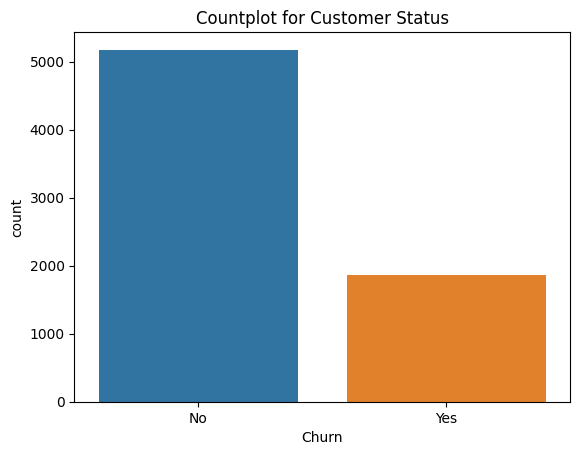

In [ ]:
sns.countplot(x=df["Churn"])
plt.title("Countplot for Customer Status")

In [ ]:
gb = df.groupby("Churn").agg({'Churn': 'count'})
gb

,Churn
Churn,
No,5174
Yes,1869


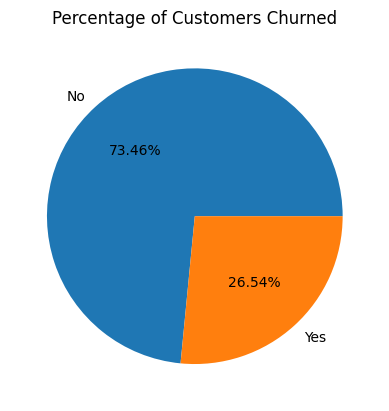

In [ ]:
plt.pie(gb["Churn"],labels=gb.index,autopct='%1.2f%%')
plt.title("Percentage of Customers Churned")
plt.show()

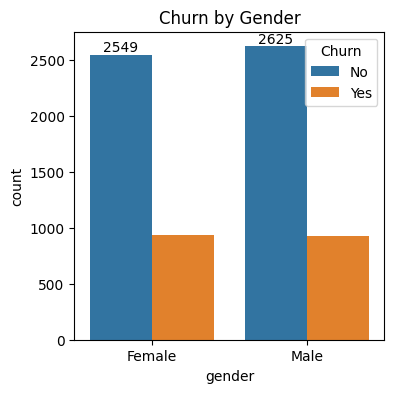

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x=df["gender"],data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Gender")
plt.show()

#Gender-wise Churn Analysis

From the chart above, we can observe that **churn is not significantly impacted by gender**.  
Both male and female customers show nearly equal churn rates, indicating that gender is not a key differentiator in customer churn behavior.


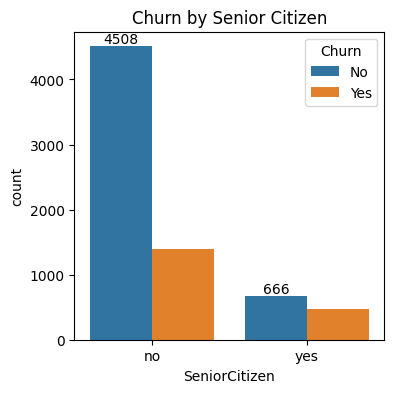

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x=df["SeniorCitizen"],data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Senior Citizen")
plt.show()


#Churn Among Senior Citizens

The chart above indicates that **senior citizens have a higher churn rate** compared to non-senior customers.  
This suggests that age (or age-related factors) may influence customer retention.  
Let's explore this segment further to understand the underlying reasons.


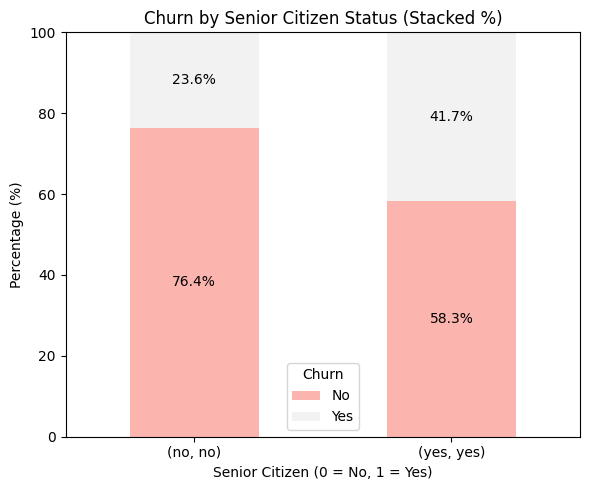

In [ ]:
percent_df = (df.groupby(['SeniorCitizen', 'Churn']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack(fill_value=0))

ax = percent_df.plot(kind='bar', stacked=True, figsize=(6, 5), colormap='Pastel1')


for i, row in enumerate(percent_df.values):
    cumulative = 0
    for val in row:
        if val > 0:
            plt.text(i, cumulative + val / 2, f'{val:.1f}%', ha='center', va='center')
        cumulative += val

plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.ylabel('Percentage (%)')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.title('Churn by Senior Citizen Status (Stacked %)')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

#Increased Churn Among Senior Citizens

The visualization indicates that **senior citizens are churning at a noticeably higher rate** compared to non-senior customers.  
This trend suggests that age may play a role in customer dissatisfaction or service disengagement.  
Further analysis is needed to uncover which services or conditions contribute to this behavior.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

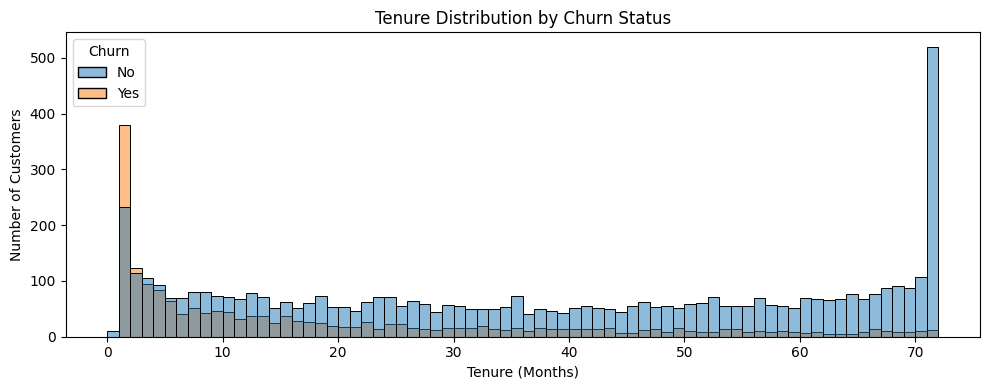

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="tenure", bins=72, hue="Churn")
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

#Churn vs. Tenure

The chart shows that **most customer churn occurs during the early months of subscription**.  
As tenure increases, the likelihood of churn decreases significantly — indicating that **long-term customers tend to stay loyal**.  
This highlights the importance of early customer engagement and satisfaction to improve retention.

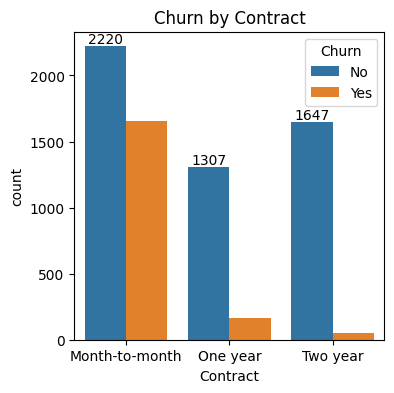

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x=df["Contract"],data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Contract")
plt.show()

#Churn by Contract Type

The analysis reveals that **customers with month-to-month contracts are far more likely to churn**  
compared to those on one-year or two-year contracts.  
This suggests that long-term contracts may contribute to customer retention by offering stability or incentives.

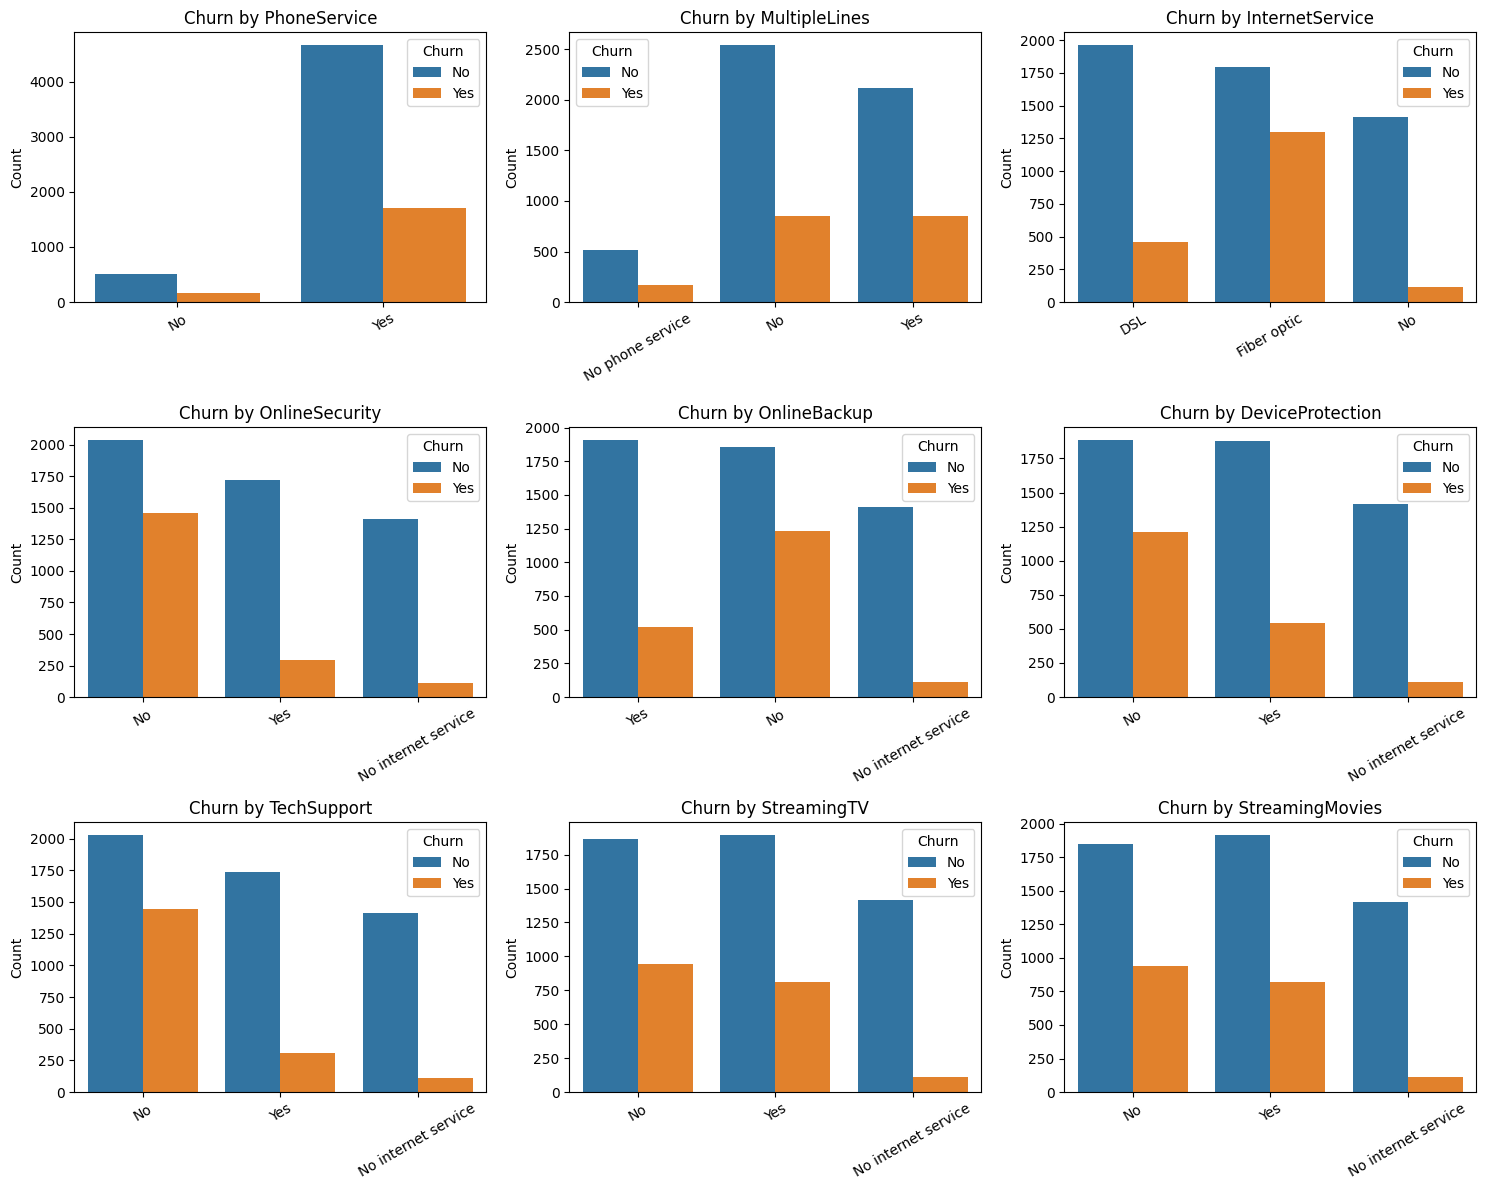

In [ ]:
# Columns to plot
features = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten to iterate easily

for i, col in enumerate(features):
    sns.countplot(data=df, x=col, hue="Churn", ax=axes[i])
    axes[i].set_title(f"Churn by {col}")
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

#Services Impacting Churn

Customers using **fiber optic internet, multiple lines, and lacking online security or tech support**  
show a significantly higher churn rate.  

On the other hand, customers with **no internet service** tend to churn less — likely due to limited service engagement.

This suggests that **digital engagement without adequate support or protection** is a key driver of customer dissatisfaction and churn.

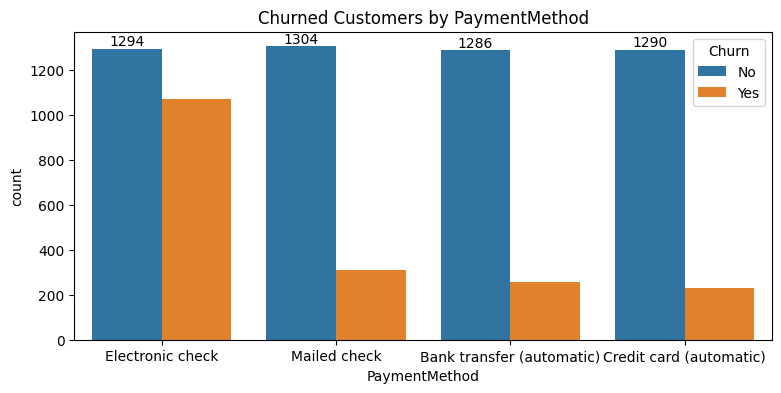

In [ ]:
plt.figure(figsize=(9,4))
ax=sns.countplot(x=df["PaymentMethod"],data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churned Customers by PaymentMethod")
plt.show()

#Churn by Payment Method

Customers who use **electronic check** as their payment method show a significantly higher likelihood of churn.  
This could be due to **lack of automation, perceived inconvenience, or lower customer satisfaction** associated with this method.

In contrast, customers using **automatic payments via bank transfer, credit card, or mailed checks** tend to churn less — possibly indicating higher trust or commitment.

#Conclusion

This Exploratory Data Analysis helped uncover key patterns behind customer churn in the telecom sector:

- **Senior citizens**, **month-to-month contracts**, and **electronic check payments** are strongly associated with higher churn.
- Lack of **online security** and **tech support**, along with **fiber optic internet**, also contribute to churn.
- Customers with **longer tenure** and **long-term contracts** are more likely to stay.

These insights can be used by telecom companies to:
- Improve retention strategies
- Design targeted offers for at-risk customer segments
- Focus support and engagement during the **early months of subscription**

---

#What's Next?

While this notebook focuses on EDA, the next step would be to **build a predictive model** using these insights.  
This could involve:
- Encoding categorical variables
- Feature scaling and selection
- Training classification models (e.g., logistic regression, decision trees)

---

As I continue learning machine learning, this analysis serves as a solid foundation for predictive modeling in the future.
